# Is podium


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


We continue with the validation of the model that predicts the podium


In [2]:
df = pd.read_csv("../assets/data/processed/additional.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [make_scorer(balanced_accuracy_score)]
labels = np.array(["not_podium", "podium"])
podiums = df[df["positionFinal"].isin([1, 2, 3])][
    ["raceYear", "raceRound", "driverRef"]
]
podiums = podiums.groupby(by=["raceYear", "raceRound"]).agg({"driverRef": ",".join})

X = pd.read_csv("../assets/data/processed/additional_X.csv")
y = df.merge(podiums, how="left", on=["raceYear", "raceRound"], suffixes=("", "Podium"))
y = y.apply(lambda x: x["driverRef"] in x["driverRefPodium"], axis=1)

## K-Nearest Neighbors


KNeighborsClassifier(metric='cosine', n_neighbors=53, weights='distance'):
CV with make_scorer(balanced_accuracy_score): 0.8433228356856154
              precision    recall  f1-score   support

  not_podium       0.96      0.93      0.94      4545
      podium       0.65      0.76      0.70       756

    accuracy                           0.91      5301
   macro avg       0.80      0.84      0.82      5301
weighted avg       0.91      0.91      0.91      5301



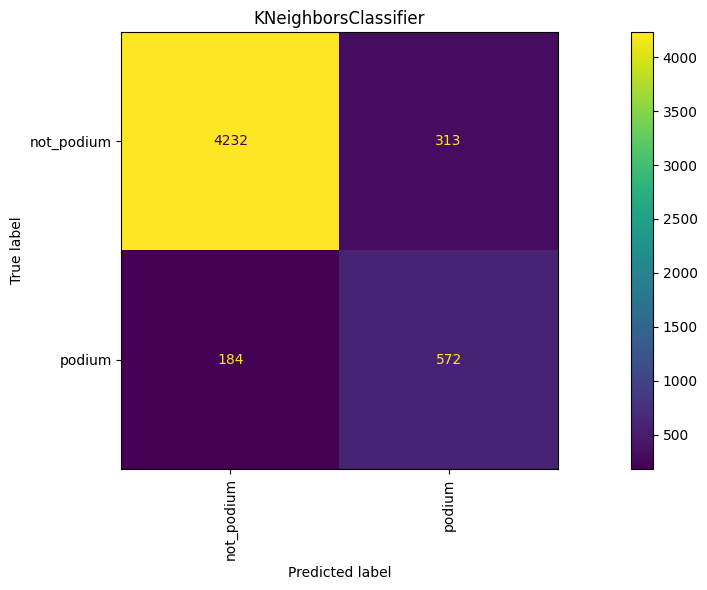

In [3]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverNumber",
        "constructorRef",
        "raceYear",
        "driverWins",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
knn = KNeighborsClassifier(n_neighbors=53, metric="cosine", weights="distance")
model_test((knn,), X_selected, y, tscv, scorers=scorers, labels=labels)

KNeighborsClassifier(metric='cosine', n_neighbors=53, weights='distance'):
CV with make_scorer(balanced_accuracy_score): 0.7984105151715456
              precision    recall  f1-score   support

  not_podium       0.94      0.93      0.94      4545
      podium       0.63      0.67      0.65       756

    accuracy                           0.90      5301
   macro avg       0.79      0.80      0.79      5301
weighted avg       0.90      0.90      0.90      5301



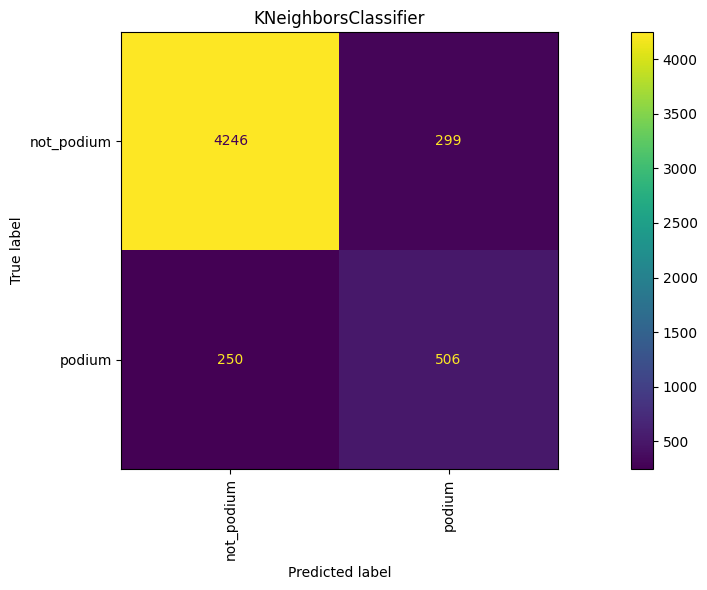

In [4]:
knn = KNeighborsClassifier(n_neighbors=53, metric="cosine", weights="distance")
model_test((knn,), X, y, tscv, scorers=scorers, labels=labels)

## Decision Tree


DecisionTreeClassifier(max_depth=3):
CV with make_scorer(balanced_accuracy_score): 0.7893964937370773
              precision    recall  f1-score   support

  not_podium       0.94      0.96      0.95      4545
      podium       0.74      0.61      0.67       756

    accuracy                           0.91      5301
   macro avg       0.84      0.79      0.81      5301
weighted avg       0.91      0.91      0.91      5301



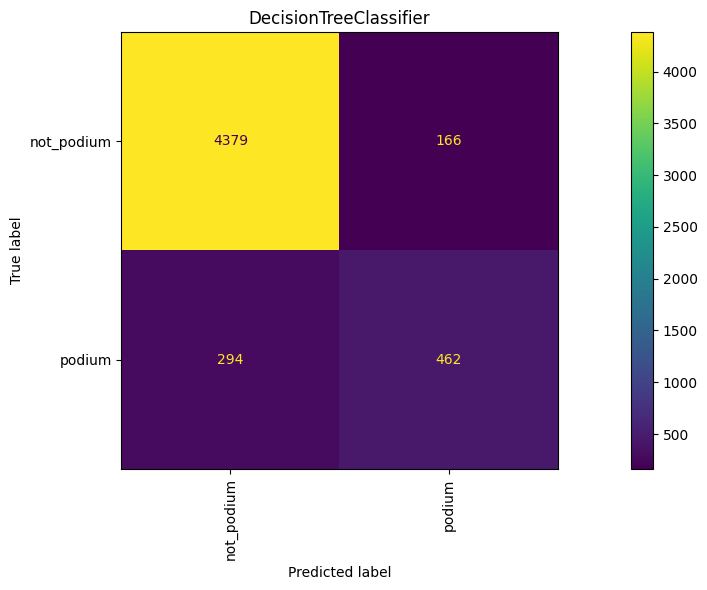

In [5]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "constructorRef",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitRef",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "circuitLng",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "q1",
        "q2",
        "q3",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
tree = DecisionTreeClassifier(max_depth=3, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, labels=labels)

DecisionTreeClassifier(max_depth=3):
CV with make_scorer(balanced_accuracy_score): 0.7900596237105522
              precision    recall  f1-score   support

  not_podium       0.94      0.96      0.95      4545
      podium       0.74      0.61      0.67       756

    accuracy                           0.91      5301
   macro avg       0.84      0.79      0.81      5301
weighted avg       0.91      0.91      0.91      5301



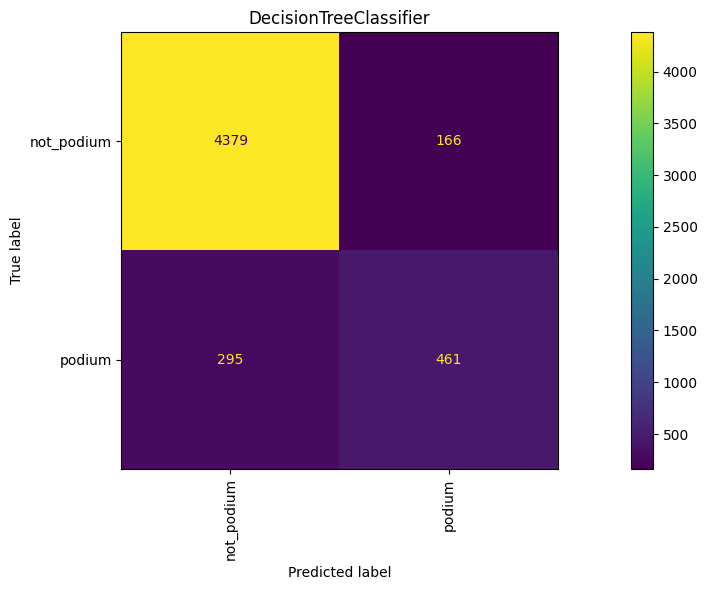

In [6]:
tree = DecisionTreeClassifier(max_depth=3, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, labels=labels)

## Random Forest


RandomForestClassifier(max_depth=8, n_estimators=440):
CV with make_scorer(balanced_accuracy_score): 0.823821552622949
              precision    recall  f1-score   support

  not_podium       0.95      0.96      0.95      4545
      podium       0.72      0.69      0.71       756

    accuracy                           0.92      5301
   macro avg       0.84      0.83      0.83      5301
weighted avg       0.92      0.92      0.92      5301



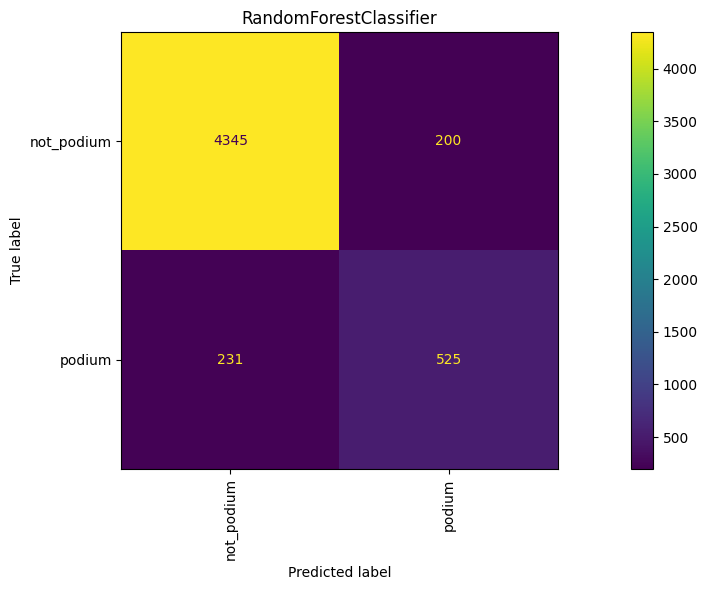

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "raceYear",
        "circuitLng",
        "driverWins",
        "q1",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
random_forest = RandomForestClassifier(max_depth=8, n_estimators=440, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, labels=labels)

RandomForestClassifier(max_depth=8, n_estimators=440):
CV with make_scorer(balanced_accuracy_score): 0.8153943491804401
              precision    recall  f1-score   support

  not_podium       0.95      0.96      0.95      4545
      podium       0.73      0.67      0.70       756

    accuracy                           0.92      5301
   macro avg       0.84      0.81      0.82      5301
weighted avg       0.91      0.92      0.92      5301



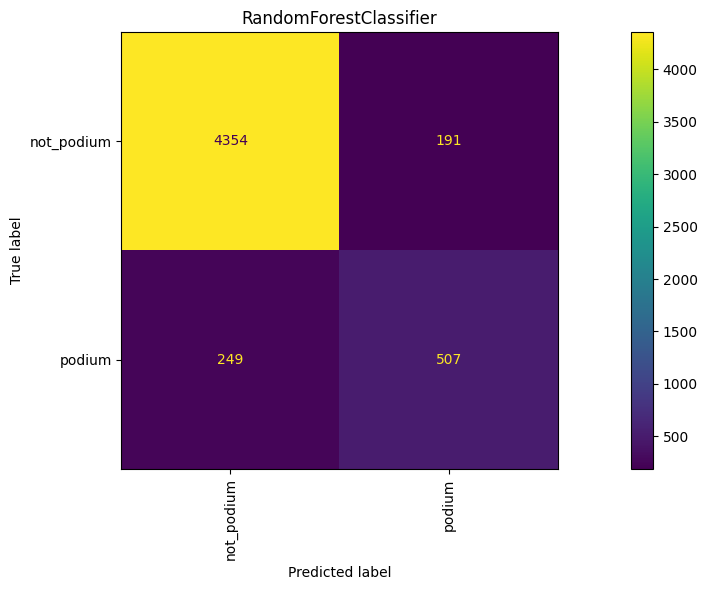

In [8]:
random_forest = RandomForestClassifier(max_depth=8, n_estimators=440, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, labels=labels)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(63, 30, 7)):
CV with make_scorer(balanced_accuracy_score): 0.855536828944519
              precision    recall  f1-score   support

  not_podium       0.96      0.93      0.95      4545
      podium       0.66      0.78      0.71       756

    accuracy                           0.91      5301
   macro avg       0.81      0.86      0.83      5301
weighted avg       0.92      0.91      0.91      5301



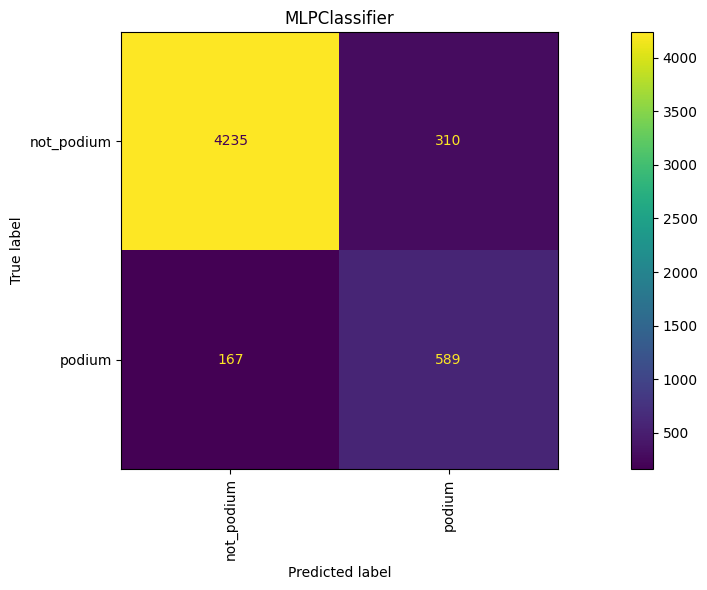

In [9]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "driverNumber",
        "driverNationality",
        "raceYear",
        "raceRound",
        "circuitRef",
        "circuitLocation",
        "circuitLat",
        "circuitAlt",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "driverAgeToday",
        "driverAgeAtRace",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(63, 30, 7))
model_test((nn,), X_selected, y, tscv, scorers=scorers, labels=labels)

MLPClassifier(activation='logistic', hidden_layer_sizes=(63, 30, 7)):
CV with make_scorer(balanced_accuracy_score): 0.8589255596994594
              precision    recall  f1-score   support

  not_podium       0.96      0.92      0.94      4545
      podium       0.63      0.78      0.70       756

    accuracy                           0.90      5301
   macro avg       0.80      0.85      0.82      5301
weighted avg       0.92      0.90      0.91      5301



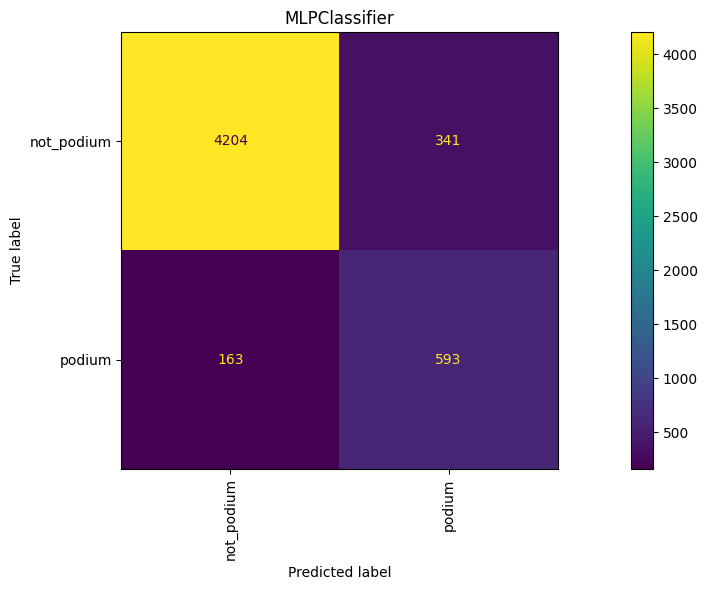

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(63, 30, 7))
model_test((nn,), X, y, tscv, scorers=scorers, labels=labels)

## Results


Based on the model in the previous section, i.e. with optimised attributes, this time, performance has been improved.

With all attributes, in this case, performance has been improved too.
